In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

from datetime import datetime
now = datetime.now()

import warnings
warnings.filterwarnings("ignore")

from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# **Reading pre-processed Dataset**

We have pre-processed the dataset as part of EDA during the last assignment

In [2]:
customer_data = pd.read_csv("marketing_campaign_eng.csv", index_col='ID', infer_datetime_format=True)

In [3]:
customer_data.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Days_Since_Customer,Marital_Status_Ct,Num_Kids,Tot_Cmp_Accepted,Itm_Total
ID,,,,,,,,,,,,,,,,,,,,,,,,
5524,Graduation,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,1,65,3873.586824,1,0,0,2252
2174,Graduation,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,68,3027.586824,1,2,0,38
4141,Graduation,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,57,3374.586824,2,0,0,1202
6182,Graduation,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,38,2967.586824,2,1,0,64
5324,PhD,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,41,3223.586824,2,1,0,595


In [4]:
customer_data.dtypes

Education               object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Complain                 int64
Response                 int64
Age                      int64
Days_Since_Customer    float64
Marital_Status_Ct        int64
Num_Kids                 int64
Tot_Cmp_Accepted         int64
Itm_Total                int64
dtype: object

In [5]:
# Changing object data type to categorical
customer_data['Education'] = pd.Categorical(customer_data.Education)

In [6]:
#Education column has 5 unique values
print(customer_data.Education.unique())
print(customer_data.Education.value_counts())

['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle']
Categories (5, object): ['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD']
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


In [7]:
#Converting all categorical to numeric using cat codes
cat_columns = customer_data.select_dtypes(['category']).columns
customer_data[cat_columns] = customer_data[cat_columns].apply(lambda x: x.cat.codes)

In [8]:
customer_data.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Days_Since_Customer,Marital_Status_Ct,Num_Kids,Tot_Cmp_Accepted,Itm_Total
ID,,,,,,,,,,,,,,,,,,,,,,,,
5524,2,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,1,65,3873.586824,1,0,0,2252
2174,2,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,68,3027.586824,1,2,0,38
4141,2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,57,3374.586824,2,0,0,1202
6182,2,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,38,2967.586824,2,1,0,64
5324,4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,41,3223.586824,2,1,0,595


In [9]:
customer_data.dtypes

Education                 int8
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Complain                 int64
Response                 int64
Age                      int64
Days_Since_Customer    float64
Marital_Status_Ct        int64
Num_Kids                 int64
Tot_Cmp_Accepted         int64
Itm_Total                int64
dtype: object

In [10]:
print("['Graduation' : 2, 'PhD' : 4, 'Master' : 3, 'Basic' : 1, '2n Cycle' : 0]\n")
print(customer_data.Education.unique())
print(customer_data.Education.value_counts())

['Graduation' : 2, 'PhD' : 4, 'Master' : 3, 'Basic' : 1, '2n Cycle' : 0]

[2 4 3 1 0]
2    1127
4     486
3     370
0     203
1      54
Name: Education, dtype: int64


# **Dimensionality Reduction**


## Imports

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
import plotly.graph_objects as go

## Scaling

In [12]:
dataC = customer_data.copy()
scaler = StandardScaler()
dataC = scaler.fit_transform(dataC)
scaled_data = pd.DataFrame(dataC, columns= customer_data.columns)
print("Dataset after scaling:")
scaled_data.head()

Dataset after scaling:


,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Days_Since_Customer,Marital_Status_Ct,Num_Kids,Tot_Cmp_Accepted,Itm_Total
0,-0.350141,0.235327,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,1.409304,2.510890,-0.550785,0.693904,-0.097282,2.388846,0.985345,1.976745,-1.346874,-1.264505,-0.439037,1.466973
1,-0.350141,-0.235826,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,-0.097282,-0.418612,1.235733,-1.667011,-1.346874,1.396361,-0.439037,-0.952725
2,-0.350141,0.773633,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,1.409304,-0.226541,1.295237,-0.542647,-0.097282,-0.418612,0.317643,-0.172468,0.742460,-1.264505,-0.439037,0.319420
3,-0.350141,-1.022732,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,-0.097282,-0.418612,-1.268149,-1.925433,0.742460,0.065928,-0.439037,-0.924309
4,1.428354,0.241519,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,1.384715,0.329427,0.115638,0.064556,-0.130463,-0.097282,-0.418612,-1.017761,-0.822831,0.742460,0.065928,-0.439037,-0.343975


## PCA

In [13]:
scaled_dataC = scaled_data.copy()
pca = PCA(n_components = 3,random_state = 42)
scaled_dataC = pca.fit_transform(scaled_dataC)
PCA_customer_data = pd.DataFrame(scaled_dataC, columns=["col1","col2", "col3"])

print("Let's have a glimpse of the PCA transformed dataset :")
PCA_customer_data.head()

Let's have a glimpse of the PCA transformed dataset :


,col1,col2,col3
0,4.456869,0.124419,2.479980
1,-2.885769,0.144040,-1.520573
2,1.964414,-0.698630,-0.681041
3,-2.682921,-1.776209,-0.202634
4,-0.508616,-0.005824,-0.392733


In [14]:
x = PCA_customer_data["col1"]
y = PCA_customer_data["col2"]
z = PCA_customer_data["col3"]

print(f"Let's have a look on the dataset after dimensionality reduction :")

fig = go.Figure(data = [go.Scatter3d(x=x, y=y, z=z,mode='markers',
                marker = dict(size=10, color="#682F2F", opacity=0.8))])
fig.update_layout(title=dict(text= "Dataset After Diemsionality Reduction[3D Projection]",
                             y=0.97,x=0.5,xanchor= "center",yanchor= "top",font_color="black"),
                  scene=dict(xaxis = dict(title="col1",backgroundcolor="#D4C8BA",showbackground=True,showgrid=True, gridwidth=2, gridcolor='white',zerolinecolor="white"),
                             yaxis = dict(title="col2",backgroundcolor="#D4C8BA",showbackground=True,showgrid=True, gridwidth=2, gridcolor='white',zerolinecolor="white"),
                             zaxis = dict(title="col3",backgroundcolor="#D4C8BA",showbackground=True,showgrid=True, gridwidth=2, gridcolor='white',zerolinecolor="white")),
                  margin=dict(l=0, r=0, b=0, t=0),paper_bgcolor="#D4C8BA")
fig.show()

Let's have a look on the dataset after dimensionality reduction :


# **Clustering**


## Determining number of clusters using Elbow Method

In [15]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

In [16]:
PCA_customer_data.dtypes

col1    float64
col2    float64
col3    float64
dtype: object

We have a total of 3 attributes, we will use Elbow Method to determine the number of clusters to be formed.

We will be using KMeans mode for the elbow method and and start k parameter at k = 10

Elbow Method to determine the number of clusters to be formed:


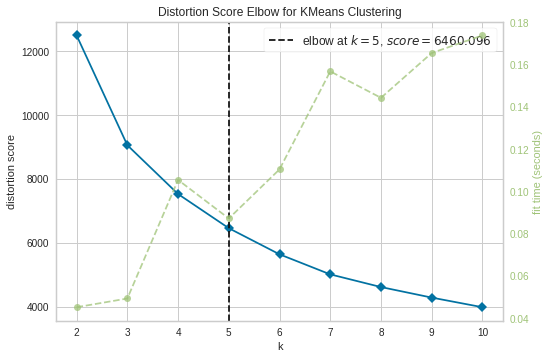

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_KM = KElbowVisualizer(KMeans(), k=10)
Elbow_KM.fit(PCA_customer_data)
Elbow_KM.show()

**Insights from the above Elbow Method:**

1. We will use k = 5, thus there will be five clusters in our dataset.
2. We will use Agglomerative Clustering Algorithm for clustering.

## Agglomerative Clustering

In [18]:
from sklearn.cluster import AgglomerativeClustering

In [20]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=5)

# fit model and predict clusters
cluster_AC = AC.fit_predict(PCA_customer_data)
PCA_customer_data["Clusters"] = cluster_AC

#Adding the Clusters feature to the orignal dataframe.
customer_data["Clusters"]= cluster_AC

In [41]:
color_palette = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#FFBF00"]

Let us now look at the distribution of customers within the clusters

In [52]:
print(f"Let's have a look on the dataset after clustering :")

fig = go.Figure(data = [go.Scatter3d(x=x, y=y, z=z,mode='markers',
                marker = dict(size=5, color=PCA_customer_data["Clusters"],colorscale=color_palette, opacity=1))])
fig.update_layout(title=dict(text= "Dataset After Clustering[3D Projection]",
                             y=0.97,x=0.5,xanchor= "center",yanchor= "top",font_color="black"),
                  scene=dict(xaxis = dict(title="col1",backgroundcolor="#D4C8BA",showbackground=True,showgrid=True, gridwidth=2, gridcolor='white',zerolinecolor="white"),
                             yaxis = dict(title="col2",backgroundcolor="#D4C8BA",showbackground=True,showgrid=True, gridwidth=2, gridcolor='white',zerolinecolor="white"),
                             zaxis = dict(title="col3",backgroundcolor="#D4C8BA",showbackground=True,showgrid=True, gridwidth=2, gridcolor='white',zerolinecolor="white")),
                  margin=dict(l=0, r=0, b=0, t=0),paper_bgcolor="#D4C8BA")
fig.show()

Let's have a look on the dataset after clustering :


In [24]:
# checking matplotlib version as bar_label feature is available in matplotlib 3.4 or higher
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib version: 3.5.3


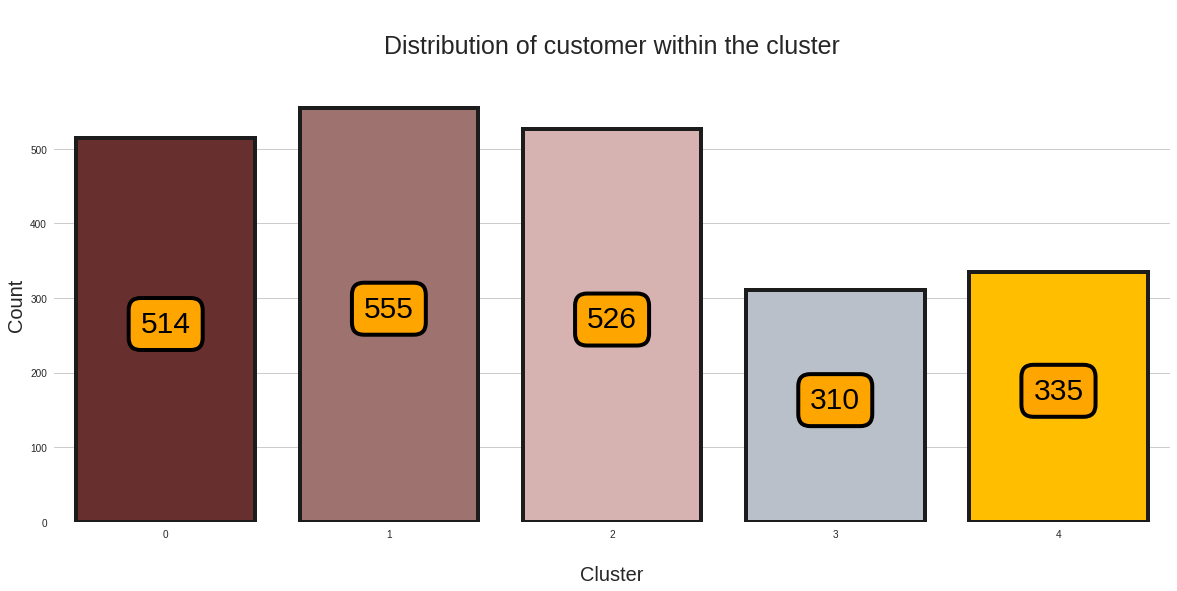

In [44]:
plt.subplots(figsize = (20, 8))
p = sns.countplot(x = customer_data["Clusters"], palette = color_palette, saturation = 1, edgecolor = "#1c1c1c", linewidth = 4)
p.axes.set_yscale("linear")
p.axes.set_title("\nDistribution of customer within the cluster\n", fontsize = 25)
p.axes.set_ylabel("Count", fontsize = 20)
p.axes.set_xlabel("\nCluster", fontsize = 20)
p.axes.set_xticklabels(p.get_xticklabels(), rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 6, size = 30, color = "black", rotation=0, bbox={"boxstyle" : "round", "pad" : 0.4, "facecolor" : "orange", "edgecolor" : "black", "linewidth" : 4, "alpha" : 1})

sns.despine(left = True, bottom = True)
plt.show()

**Insights from the cluster distribution:**

* Cluster 1: 514 Customers
* Cluster 2: 555 Customers
* Cluster 3: 526 Customers
* Cluster 4: 310 Customers
* Cluster 5: 335 Customers


The clusters seem to have an almost uniform distribution.

## **Cluster Analysis**
Understanding what makes the clusters differernt from each other.


### Income - Item Expenditure Based Clustering Profile:

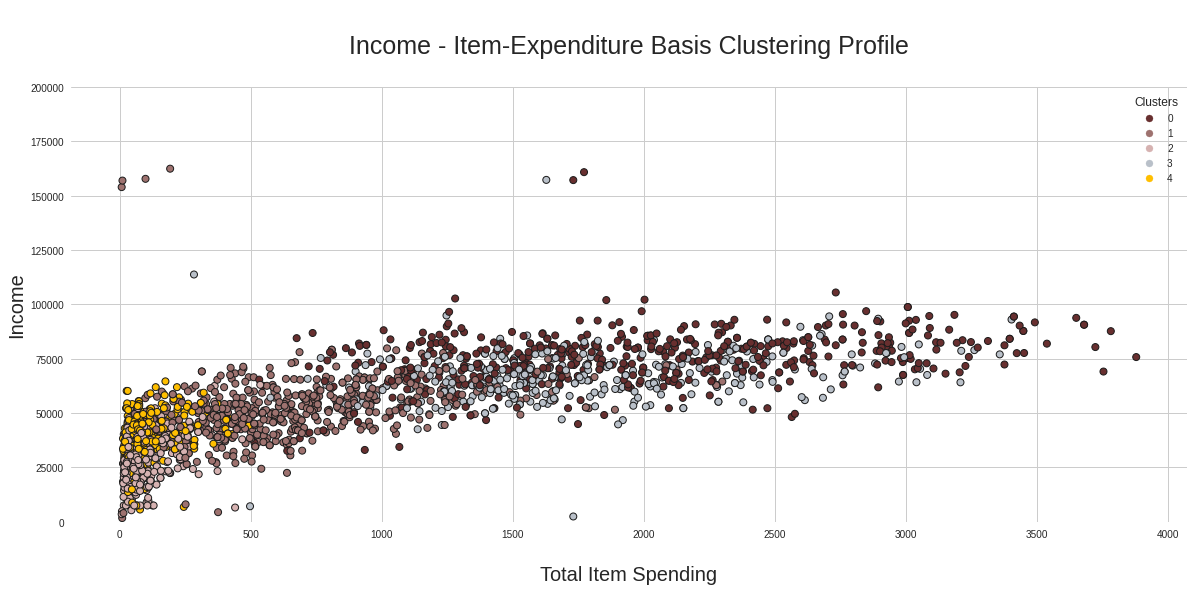

In [56]:
_, axes = plt.subplots(figsize=(20,8))
axes.set_ylim([0, 200000])

sns.scatterplot(x = customer_data["Itm_Total"], y = customer_data["Income"], hue = customer_data["Clusters"], palette = color_palette, sizes = 60, alpha=1, edgecolor = "#1c1c1c", linewidth = 1)
axes.set_title("\nIncome - Item-Expenditure Basis Clustering Profile\n", fontsize=25)
axes.set_ylabel("Income", fontsize=20)
axes.set_xlabel("\nTotal Item Spending", fontsize=20)

sns.despine(left = True, bottom = True)
plt.show()

**Inight from the above distribution**

1. We can see within cluster 0 and 3, the customer seems to have high income as a result of which thier spending is also higher.

**Why are there Outliers?**

There are customer who either have low income but high expenditure or vice-versa causing them to become outliers in the clusters. Though the number of the outliers are little, there can be valuable insights in them and cannot be completely overlooked.



### Total Item Spending based Clustering Profile:

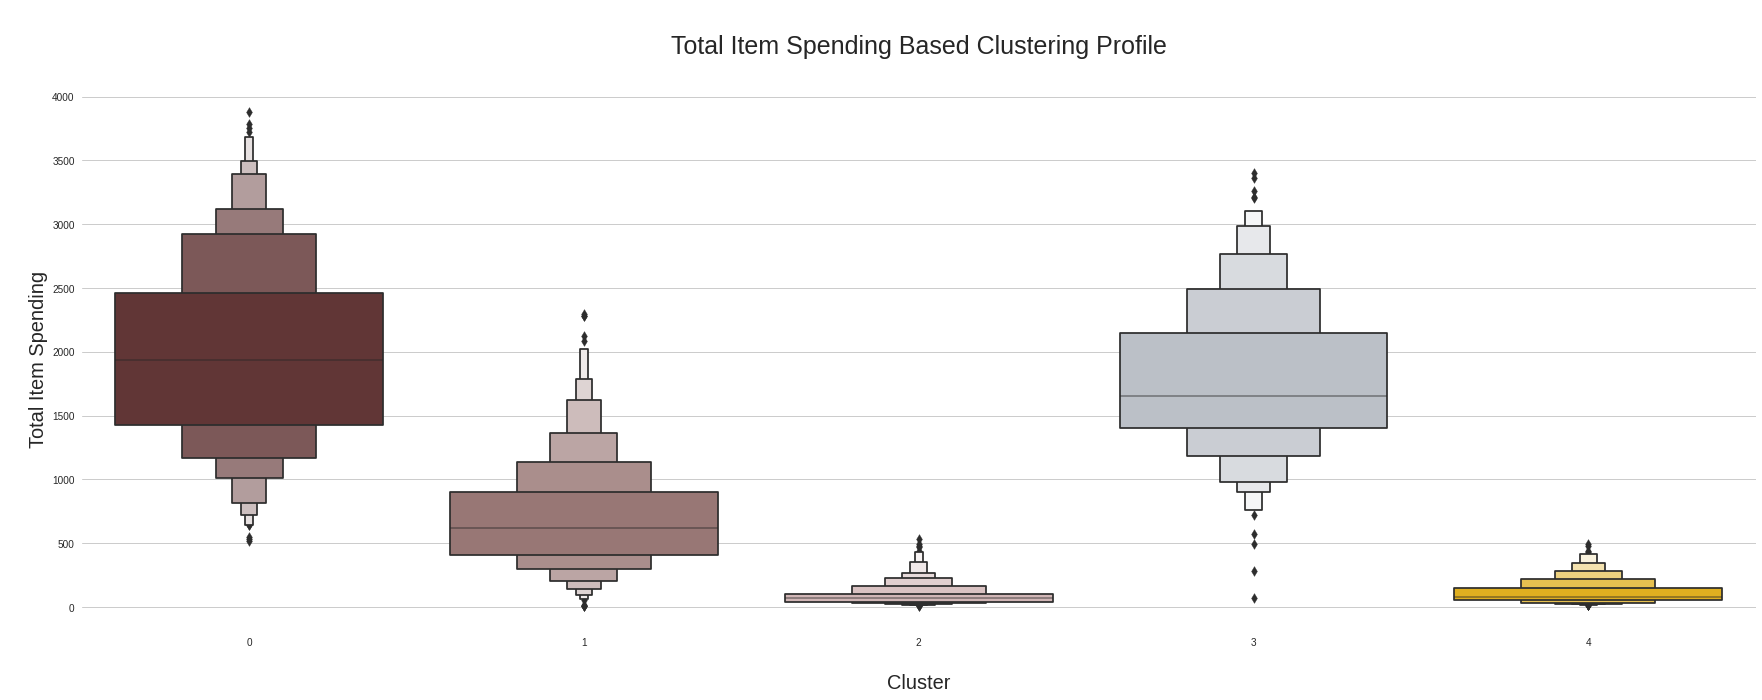

In [54]:
_, axes = plt.subplots(figsize = (30, 10))
sns.boxenplot(x = customer_data["Clusters"], y = customer_data["Itm_Total"], palette = color_palette)

axes.set_title("\nTotal Item Spending Based Clustering Profile\n", fontsize = 25)
axes.set_ylabel("\nTotal Item Spending", fontsize = 20)
axes.set_xlabel("\nCluster", fontsize = 20)

sns.despine(left = True, bottom = True)
plt.show()

**Insights:**

Clearly, the the highest spending customers belong to cluster 0 and 3.

* Most of the cluster 0 customers spending range is in between 750 to 3500.
* Most of the cluster 1 customers spending range is in between 0 to 2000.
* Most of the cluster 2 customers spending range is in between 0 to 500.
* Most of the cluster 3 customers spending range is in between 800 to 3200.
* Most of the cluster 4 customers spending range is in between 0 to 500.

### Income based Clustering Profile

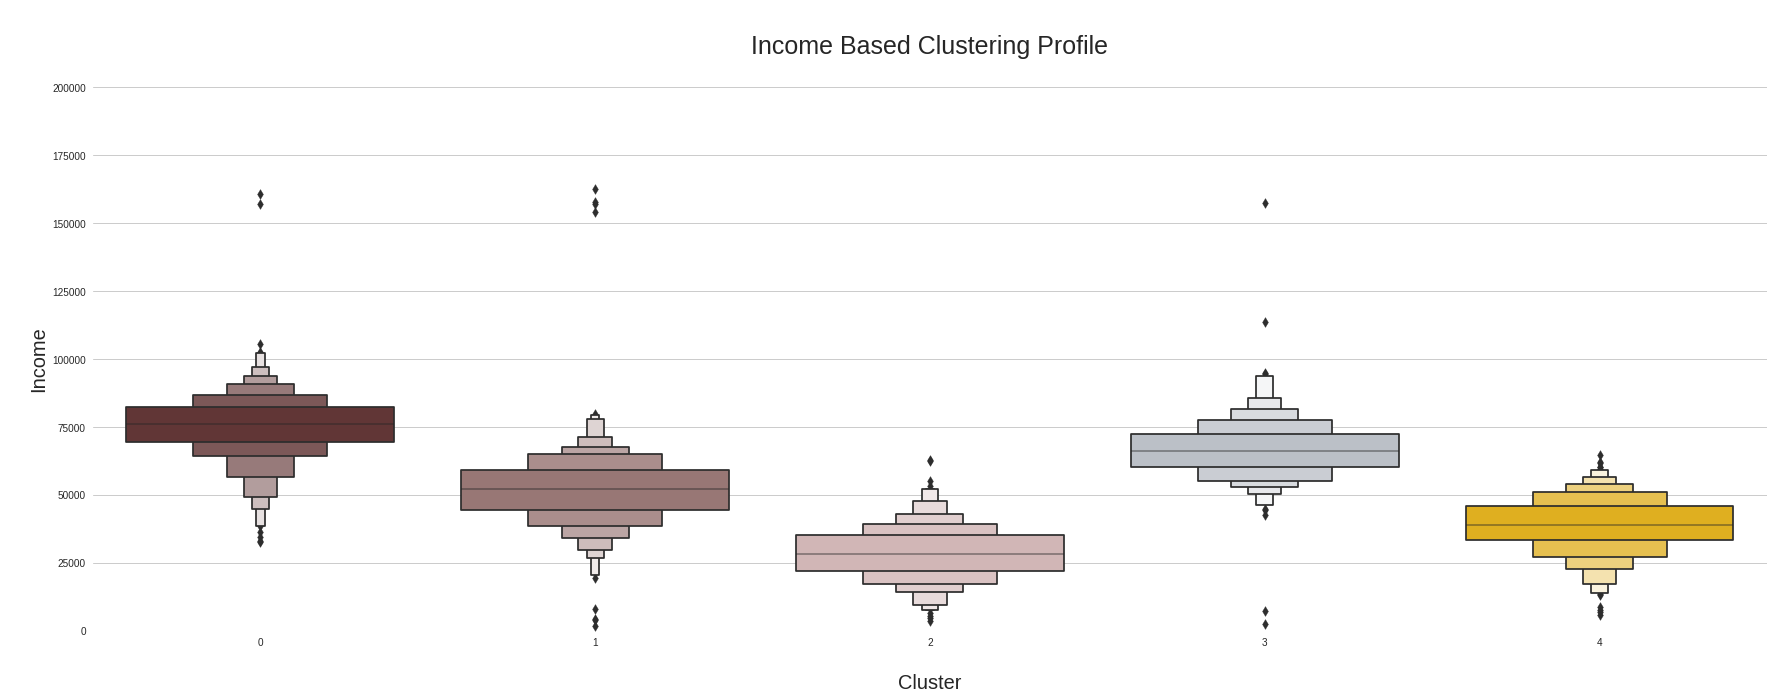

In [58]:
_, axes = plt.subplots(figsize = (30, 10))
sns.boxenplot(x = customer_data["Clusters"], y = customer_data["Income"], palette = color_palette)

axes.set_ylim([0, 200000])

axes.set_title("\nIncome Based Clustering Profile\n", fontsize = 25)
axes.set_ylabel("\nIncome", fontsize = 20)
axes.set_xlabel("\nCluster", fontsize = 20)

sns.despine(left = True, bottom = True)
plt.show()

**Insights:**

* Most of the cluster 0 customers income range is in between 40000 to 100000.
* Most of the cluster 1 customers spending range is in between 250000 to 75000.
* Most of the cluster 2 customers spending range is in between 10000 to 50000.
* Most of the cluster 3 customers spending range is in between 50000 to 90000.
* Most of the cluster 4 customers spending range is in between 20000 to 600000.

#### Cluster profiling based on Total Item Spending v/s **X**
**X** = childern, age, education level, marital status, number of kids, days since joining.

In [59]:
def density_cluster(parameter):
    _, axes = plt.subplots(figsize = (30, 12))
    sns.kdeplot(x = customer_data[parameter], y = customer_data["Itm_Total"], hue = customer_data["Clusters"], kind="kde", height = 10, palette = color_palette)
    axes.set_title(f"\nClustering Profile On {parameter}\n", fontsize = 25)
    axes.set_ylabel("Spending", fontsize = 20)
    axes.set_xlabel(f"\n{parameter}", fontsize = 20)
    
    sns.despine(left = True, bottom = True)
    plt.show()

##### Total Item Spending v/s Children

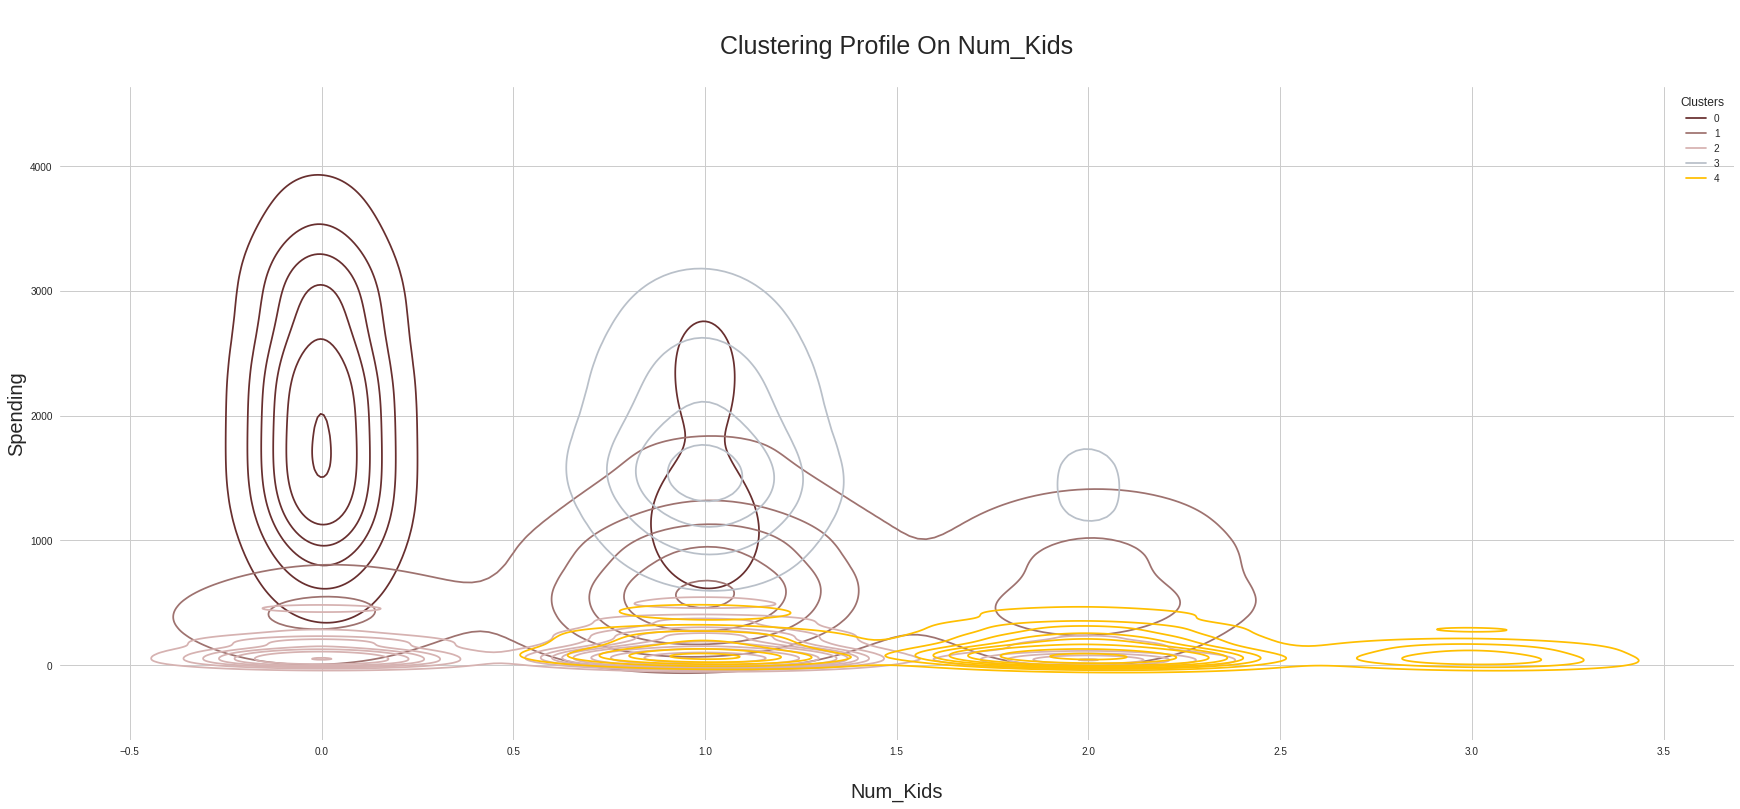

In [60]:
#cluster comparison of total item spending with total number of kids in the household
density_cluster("Num_Kids")

**Insights:**

* Most of the customers of cluster 0 have 0 children. Their spending range is in between 500 to 4000.
* Most of the customers of cluster 1 have 1 child, only a few have 0 or 2 kids. Their spending range is in between 0 to 1800.
* Most of the customers of cluster 2 have at most one child, some having two. Their spending range is in between 0 to 500.
* Most of the customers of cluster 3 have one child, a few having two. None of them has three children. Their spending range is in between 500 to 3000.
* Most of the customers of cluster 4 have no children, with a few having one child. None of them has atleast 1 or 2 children with some of them having 3 Their spending range is in between 0 to 400.

##### Total Item Spending v/s Education Level

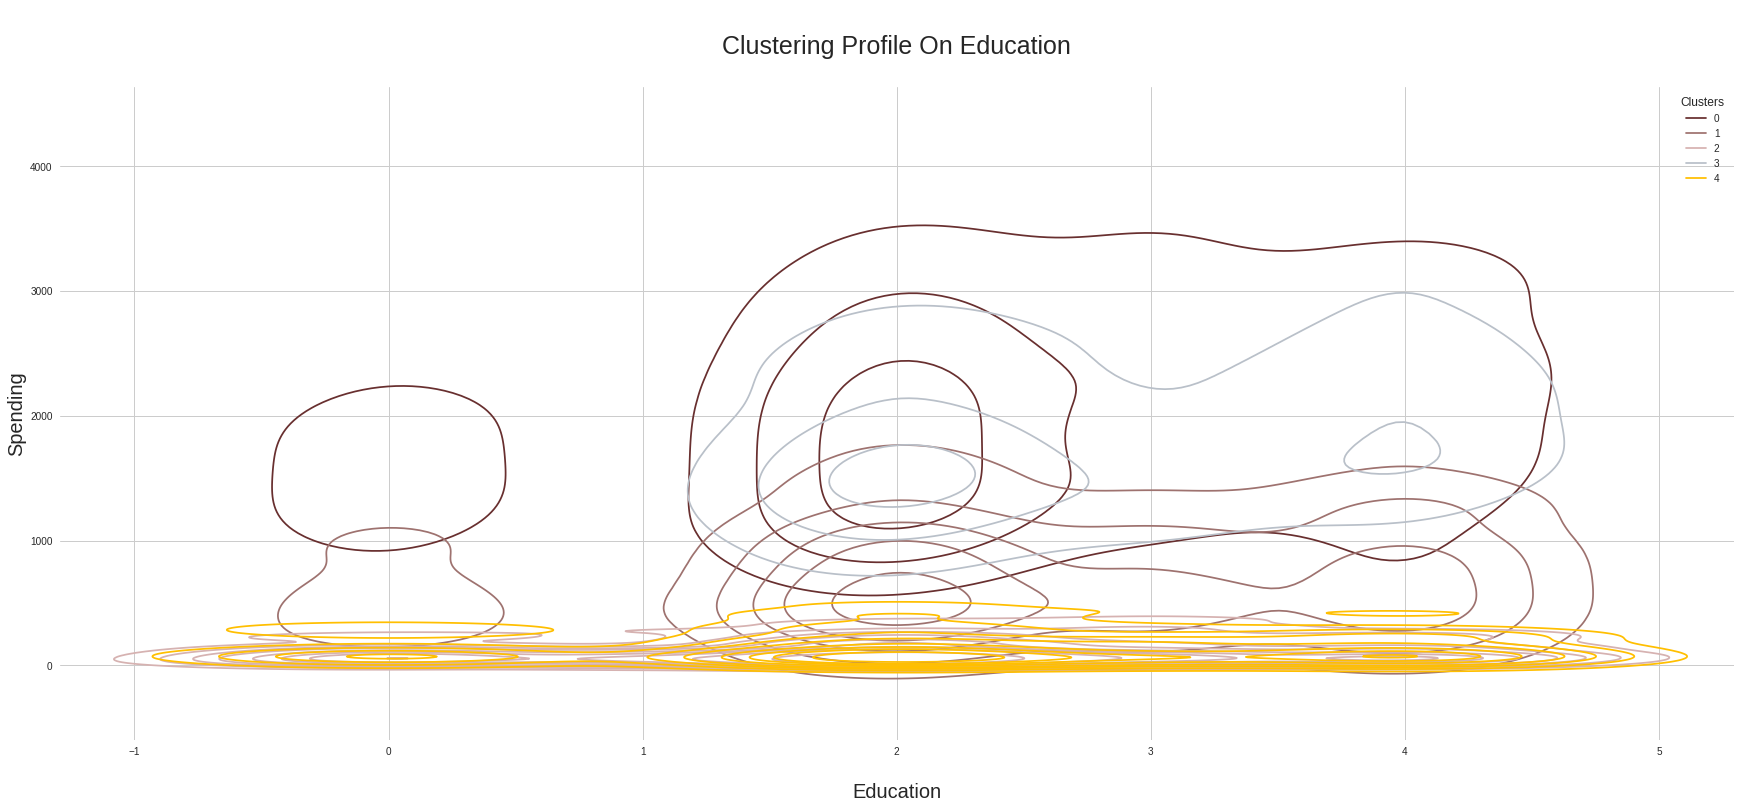

In [61]:
#cluster comparison of total item spending with the education level
density_cluster("Education")

**Insights:**

1. Phd: 4 : Postgraduate 
2. Master: 3 : Postgraduate 
3. Graduate: 2 : Graduate
4. Basic: 1 : Undergraduate
5. 2nd Cycle: 0 : Undergraduate


##### Total Item Spending v/s Age

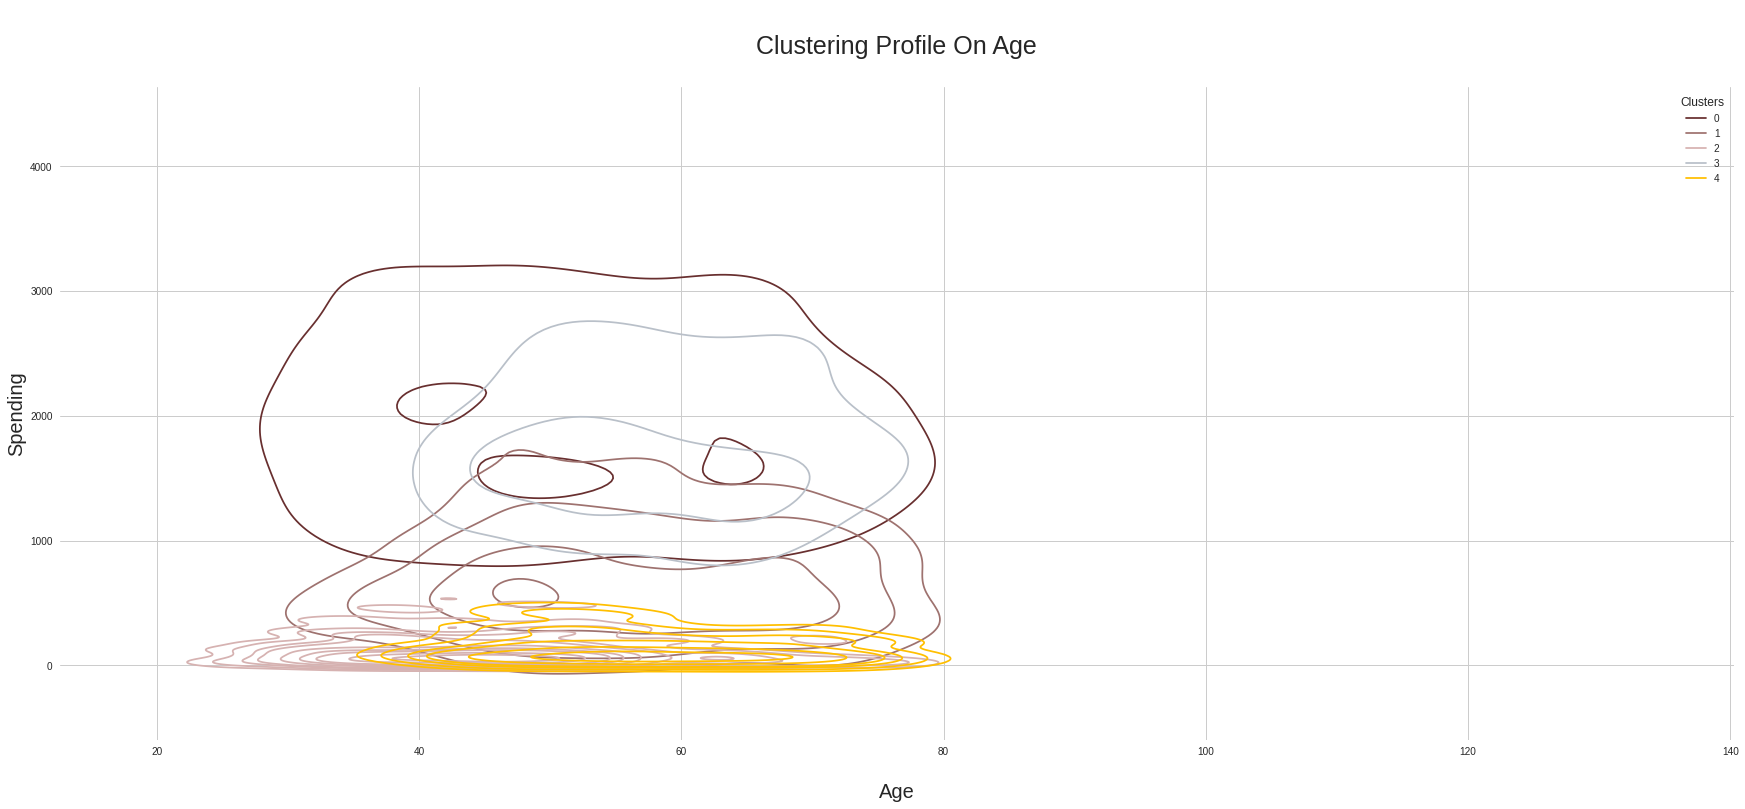

In [62]:
#cluster comparison of total item spending with their Age
density_cluster("Age")

**Insights:**

* Most of the customers of cluster 0 have age range in between 30 to 80. Their spending range is in between 1000 to 3200.
* Most of the customers of cluster 1 have age range in between 30 to 80. Their spending range is in between 0 to 1500.
* Most of the customers of cluster 2 have age range in between 22 to 70. Their spending range is in between 0 to 500.
* Most of the customers of cluster 3 have age range in between 40 to 75. Their spending range is in between 1000 to 2800.
* Most of the customers of cluster 4 have age range in between 35 to 80. Their spending range is in between 0 to 500.

##### total item spending X Marital Status

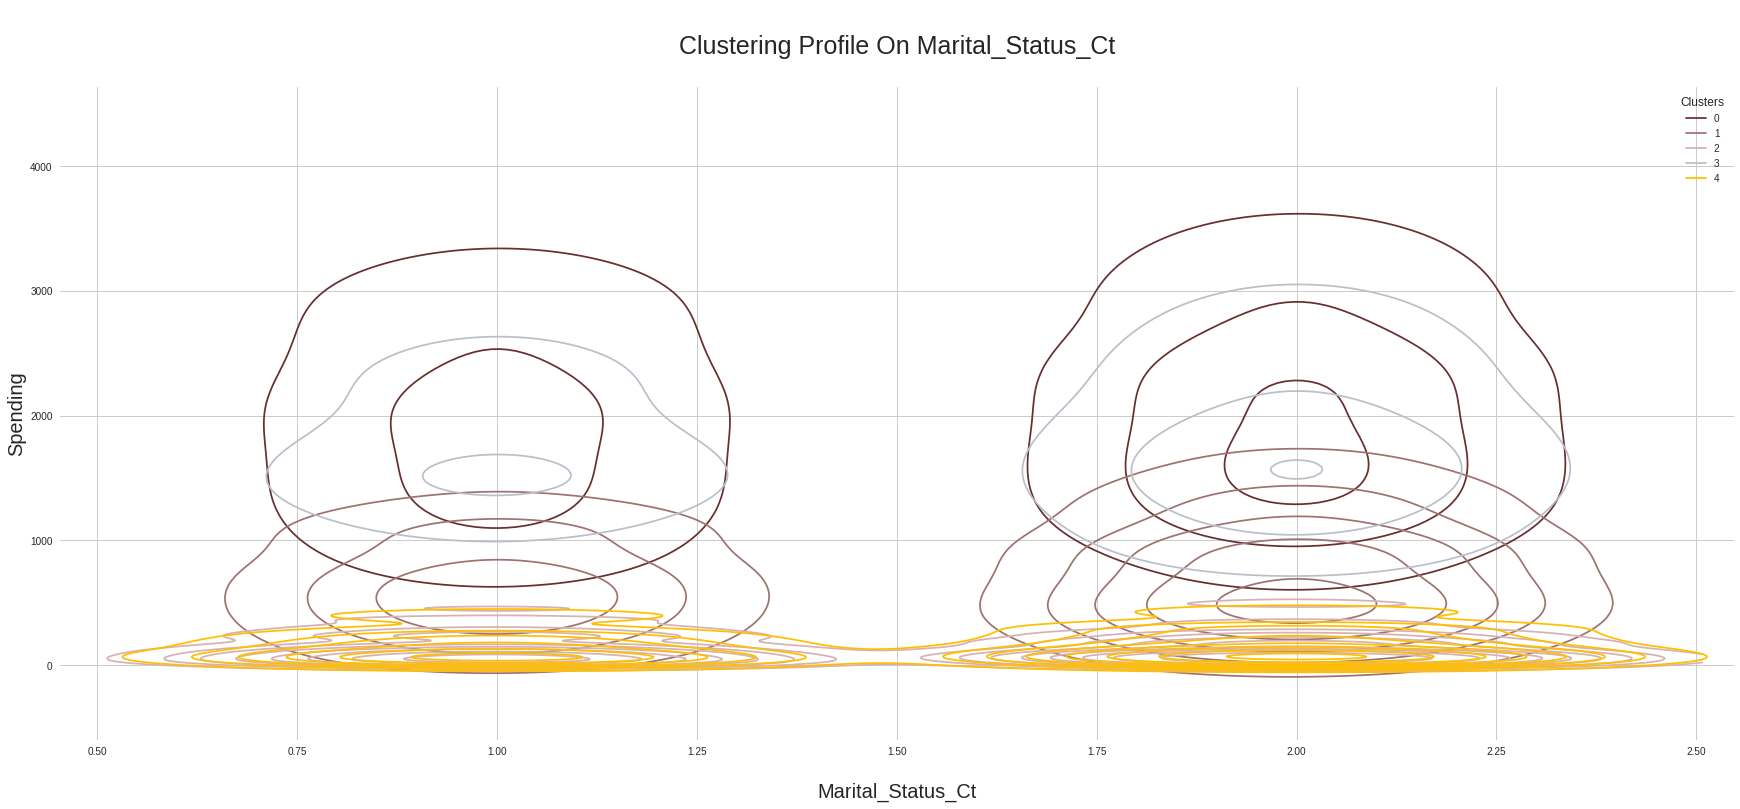

In [63]:
#cluster comparison of total item spending with their Marital Status
density_cluster("Marital_Status_Ct")

**Insights:**

1. Single or Divorcee or Widowed: 1
2. Married or Together: 2

* Some of the customers of cluster 0 are married and some are single. Their spending range is in between 800 to 3500.
* Some of the customers of cluster 1 are married and some are single. Their spending range is in between 0 to 1500.
* Some of the customers of cluster 2 are married and some are single. Their spending range is in between 0 to 500.
* Some of the customers of cluster 3 are married and some are single. Their spending range is in between 800 to 3000.
* Some of the customers of cluster 4 are married and some are single. Their spending range is in between 0 to 500.

##### Total Item Spending v/s Parental Status

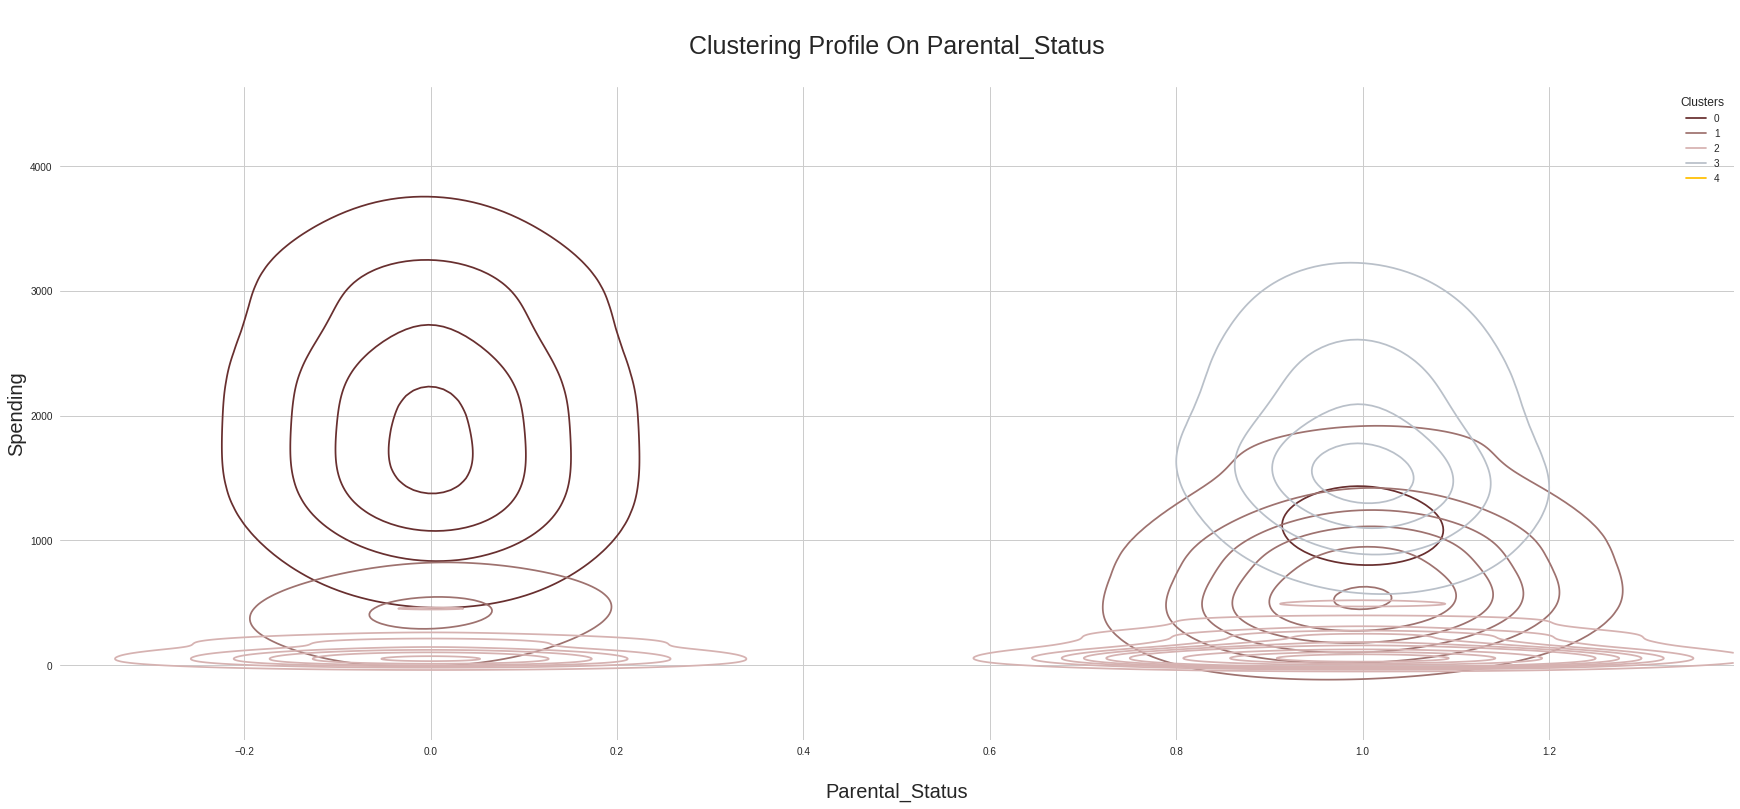

In [64]:
#cluster comparison of total item spending with their Parental Status i.e., they have kids in the household

#we will make a column to store their parental status
customer_data["Parental_Status"] = np.where(customer_data["Num_Kids"] > 0, 1, 0)

density_cluster("Parental_Status")

**Insights:**

1. Parents: 1
2. Not Parents: 0

* Most of the customers of cluster 0 are not parents and very few are parents. Their spending range is in between 500 to 3800.
* Majority of the customers of cluster 1 are parents. Their spending range is in between 0 to 2000.
* Most of the customers of cluster 2 are parents but some are non-parents. Their spending range is in between 0 to 500.
* Majority of the customers of cluster 3 are parents. Their spending range is in between 500 to 3000.
* Majority of the customers of cluster 4 are parents.

##### Total Item Spending v/s Customer Loyalty i.e. number of days since joining

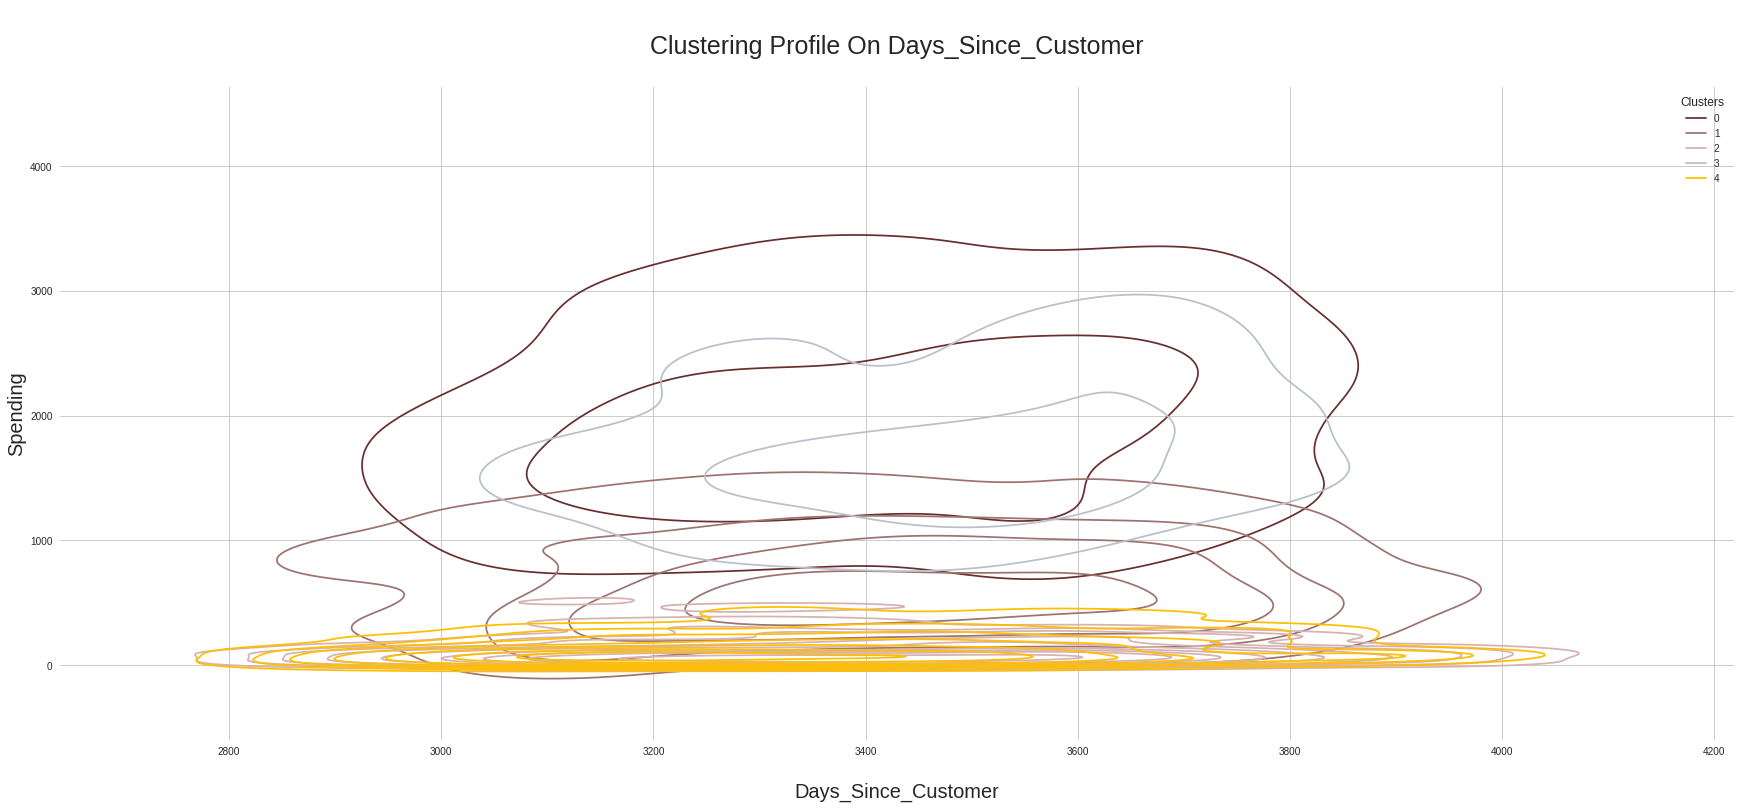

In [65]:
#cluster comparison of total item spending with their days of joining
density_cluster("Days_Since_Customer")

**Insights:**

* Most of the customers of cluster 0 are customer for 2900 to 3800 days. Their spending range is in between 800 to 3500.
* Most of the customers of cluster 1 are customer for 2700 to 3900 days. Their spending range is in between 0 to 1500.
* Most of the customers of cluster 2 are customer for 2800 to 4000 days. Their spending range is in between 0 to 500.
* Most of the customers of cluster 3 are customer for 3200 to 3800 days. Their spending range is in between 500 to 3000.
* Most of the customers of cluster 4 are customer for 2800 to 4000 days. Their spending range is in between 0 to 500.

## Cluster Profiles

### Cluster 0

* Income range is in between 0 to 75000 and spending range is in between 0 to 800
* Age range in between 30 to 80
* Mostly graduate or post graduate educational level, very few in undergrad
* Can be married and unmarried as well
* Most of them do not have a child
* Customer for at least 2900 days

### Cluster 1

* Income range is in between 70000 to 100000 and spending range is in between 1000 to 3600
* Age range in between 30 to 70
* All have completed graduation
* Can be married and unmarried as well
* They do not have any children apart from a few exception of 1 child
* Have at most one child, majority have no child.
* Customer for at least 2700 days

### Cluster 2

* Income range is in between 10000 to 55000 and spending range is in between 0 to 750
* Age range in between 20 to 60
* Belong to all education level
* Can be married and unmarried as well
* All of them are parents
* All have children, most have one or two children
* Customer for at least 2800  days

### Cluster 3

* Income range is in between 50000 to 50000 and spending range is in between 500 to 2800
* Age range in between 40 to 80
* Mostly graduate or post graduate educational level, very few in undergrad
* Can be married and unmarried as well
* Most of them are parents
* Most have at most one child
* Customer for at least 3200 days

### Cluster 4

* Income range is in between 20000 to 60000 and spending range is in between 750 to 3000
* Age range in between 35 to 80
* Mostly graduate or post graduate educational level, very few in undergrad
* Can be married and unmarried as well
* Most of them are parents
* Customer for at least 2800 days